#1. Perkenalan

Nama: Carlos Argado

Batch: HCK - 010

Objective: Prediksi harga uber & lyft dengan Linear Regression

#2. Import Libraries

In [104]:
pip install opendatasets

In [105]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma')

Skipping, found downloaded files in "./uber-and-lyft-dataset-boston-ma" (use force=True to force download)


In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# 3. Data Loading

In [108]:
df = pd.read_csv('/content/uber-and-lyft-dataset-boston-ma/rideshare_kaggle.csv')

In [109]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [110]:
# duplicate dataset
df_duplicate = df.copy()

In [111]:
# check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

insight: terdapat 57 column dengan tipe data 'object', 'float64' dan 'int64'. column 'price' merupakan satu-satunya column yang memiliki missing values.

In [112]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    print(df[i].unique())

    print(('-')*50)

id
693071
['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '64d451d0-639f-47a4-9b7c-6fd92fbd264f'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']
--------------------------------------------------
timestamp
36179
[1.54495261e+09 1.54328402e+09 1.54336682e+09 ... 1.54377528e+09
 1.54507051e+09 1.54473900e+09]
--------------------------------------------------
hour
24
[ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 14 11  7 20 13  8 12 21 17 15]
--------------------------------------------------
day
17
[16 27 28 30 29 17 26  2  3 13 14  1 18 15  4 10  9]
--------------------------------------------------
month
2
[12 11]
--------------------------------------------------
datetime
31350
['2018-12-16 09:30:07' '2018-11-27 02:00:23' '2018-11-28 01:00:22' ...
 '2018-12-17 07:15:07' '2018-11-30 05:23:02' '2018-11-29 17:38:01']
--------------------------------------------------
timezone
1
['A

In [113]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

insight: column 'price' yang merupakan target memiliki nilai mean 16.55, std 9.32 dari jumlah 637976 data.

# 4. Exploratory Data Analysis (EDA)

##I. Distribusi 'price'

In [114]:
price_skew = pd.DataFrame(df)
price_skew['price'].skew()

1.0457470560899256

Text(0.5, 1.0, 'Histogram of Price')

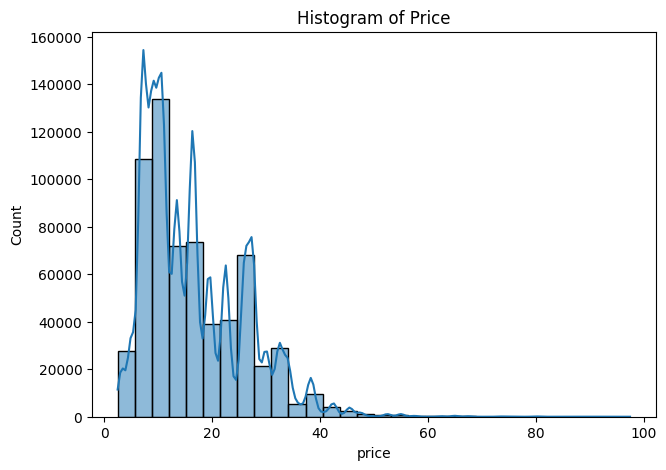

In [115]:
# create histogram and scatter-plot
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['price'], kde=True, bins = 30)
plt.title('Histogram of Price')

insight: dari nilai skewness dan persebaran data pada histogram, dataset price berpusat dengan kecondongan ke arah kiri.

##II. Jumlah data uber & lyft

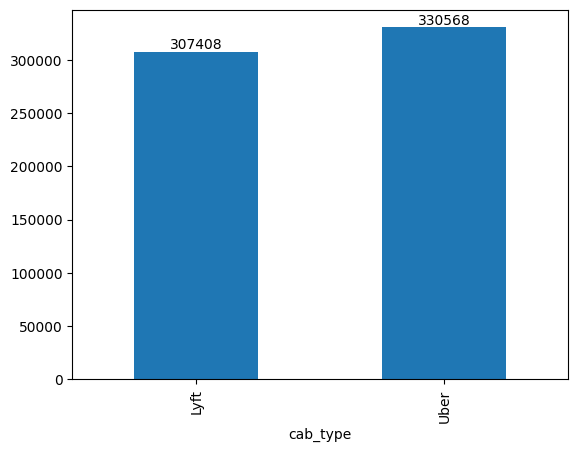

In [116]:
ax = df.groupby('cab_type')['price'].agg('count').plot(kind = 'bar')
ax.bar_label(ax.containers[0])
plt.show()

insight: Uber memiliki lebih banyak input data dibandingkan Lyft.

##III. Analisis harga antara uber & lyft beserta tipe jasa

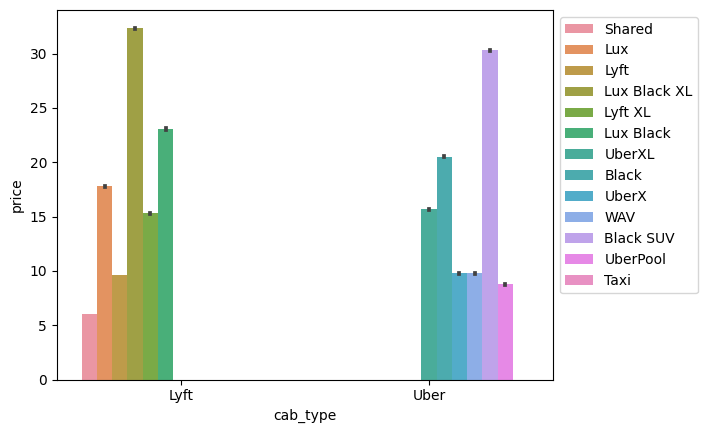

In [117]:
# grouping price berdasarkan cab type dan name
data = df.groupby(['cab_type','name'])['price'].mean()

# pembuatan barplot
sns.barplot(data = df, x='cab_type', y='price', orient='v', hue='name')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

insight: layanan 'Lyft' merupakan layanan termahal dari Lyft, sedangkan 'Black SUV' merupakan layanan termahal dari Uber.

##IV. Trend harga uber & lyft dalam sebulan

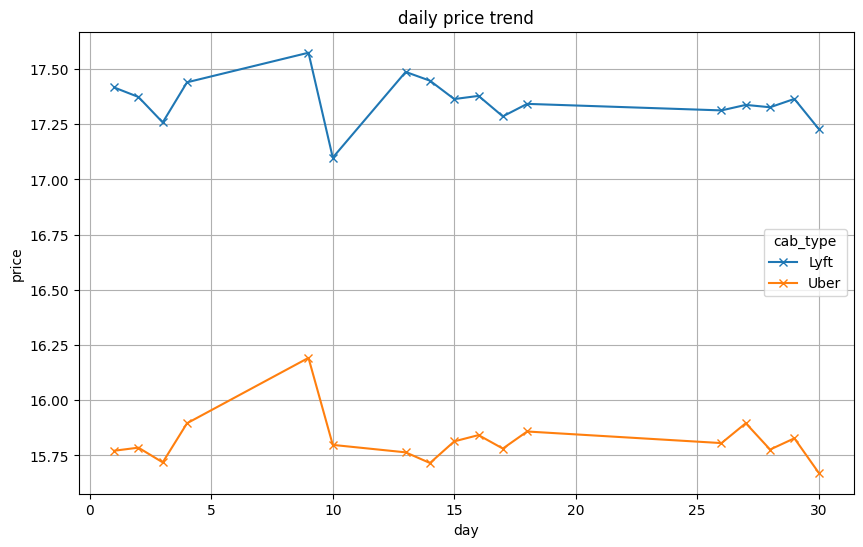

In [118]:
# grouping price berdasarkan day dan cab type
grouped = df.groupby(['day','cab_type'])['price'].mean().unstack()
grouped.plot(kind='line', marker='x', figsize=(10, 6))

# penulisan label graph
plt.xlabel('day')
plt.ylabel('price')
plt.title('daily price trend')

plt.grid(True)
plt.show()

insight: harga cenderung naik di awal bulan dan terus menurun menuju akhir bulan, namun Lyft memiliki harga layanan yang lebih tinggi.

##V. Popular Destination

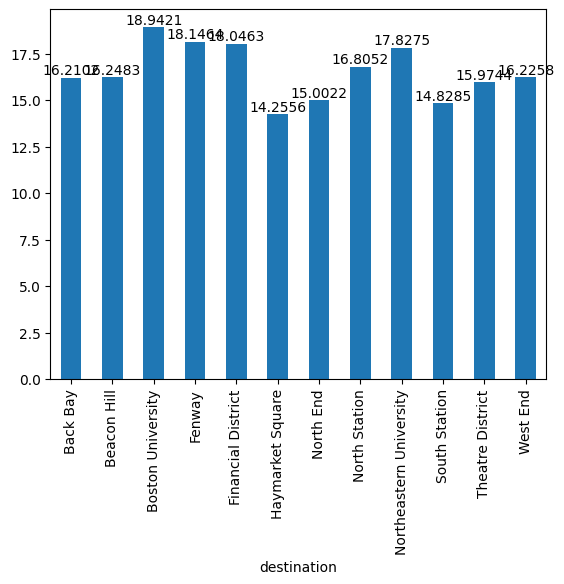

In [119]:
ax = df.groupby('destination')['price'].agg('mean').plot(kind = 'bar')
ax.bar_label(ax.containers[0])
plt.show()

insight: 3 destinasi yang memiliki harga tertinggi adalah Boston University, Fenway, dan Financial District.

##VI. Heatmap

<Axes: >

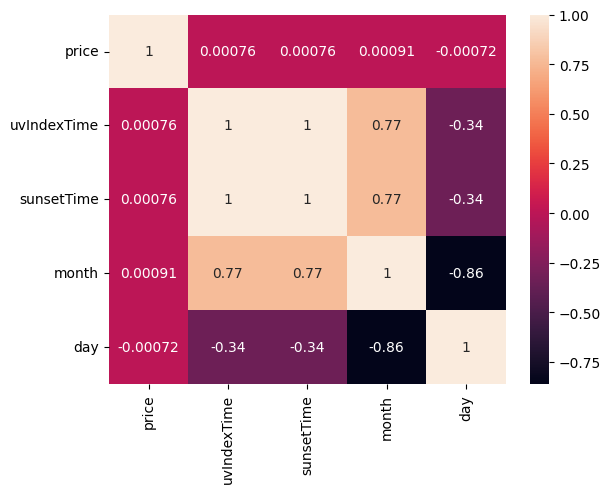

In [120]:
sns.heatmap(df[['price', 'uvIndexTime', 'sunsetTime', 'month', 'day']].corr(), annot = True)

insight: 'price' memiliki korelasi yang rendah dengan column-column lain yang diikutsertakan.

<Axes: xlabel='price', ylabel='surge_multiplier'>

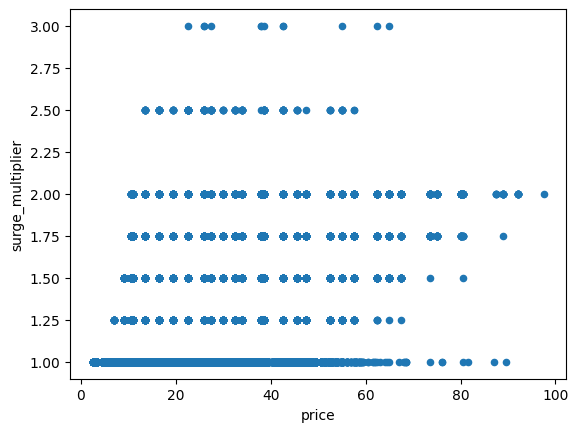

In [121]:
df.plot(kind = 'scatter', x = 'price', y = 'surge_multiplier')

# 5. Feature Engineering

Berdasarkan info dari dataset kaggle, dikatakan bahwa price dipengaruhi oleh weather, temperature, wind, dan sunset. Column-column tersebut akan dikelompokkan seperti demikian dan akan dilakukan pengetesan untuk columns yang akan masuk dalam feature selection.

## a. Feature Selection

In [122]:
df.corr()['price'].sort_values(ascending=False)

price                          1.000000
distance                       0.345061
surge_multiplier               0.240458
latitude                       0.002088
visibility.1                   0.001497
visibility                     0.001497
windGust                       0.001218
precipIntensityMax             0.001114
windSpeed                      0.000990
month                          0.000913
cloudCover                     0.000883
pressure                       0.000866
windGustTime                   0.000851
apparentTemperatureLow         0.000831
apparentTemperatureMinTime     0.000814
timestamp                      0.000808
temperatureMinTime             0.000769
temperatureMaxTime             0.000766
uvIndexTime                    0.000763
apparentTemperatureLowTime     0.000761
sunsetTime                     0.000760
sunriseTime                    0.000760
temperatureHighTime            0.000759
temperatureLowTime             0.000754
apparentTemperatureMaxTime     0.000746


insight: dari perhitungan correlation menuju price, hanya 'distance' dan 'surge_multiplier' memiliki nilai > 0.01. maka, kedua column tersebut akan masuk dalam feature selection.

###I. weather

In [155]:
# pengelompokan numerical untuk weather
weather_num = df_duplicate[['price', 'visibility','dewPoint','pressure','cloudCover',
                            'uvIndex','visibility.1','ozone','precipIntensityMax'
                          ]]

<Axes: >

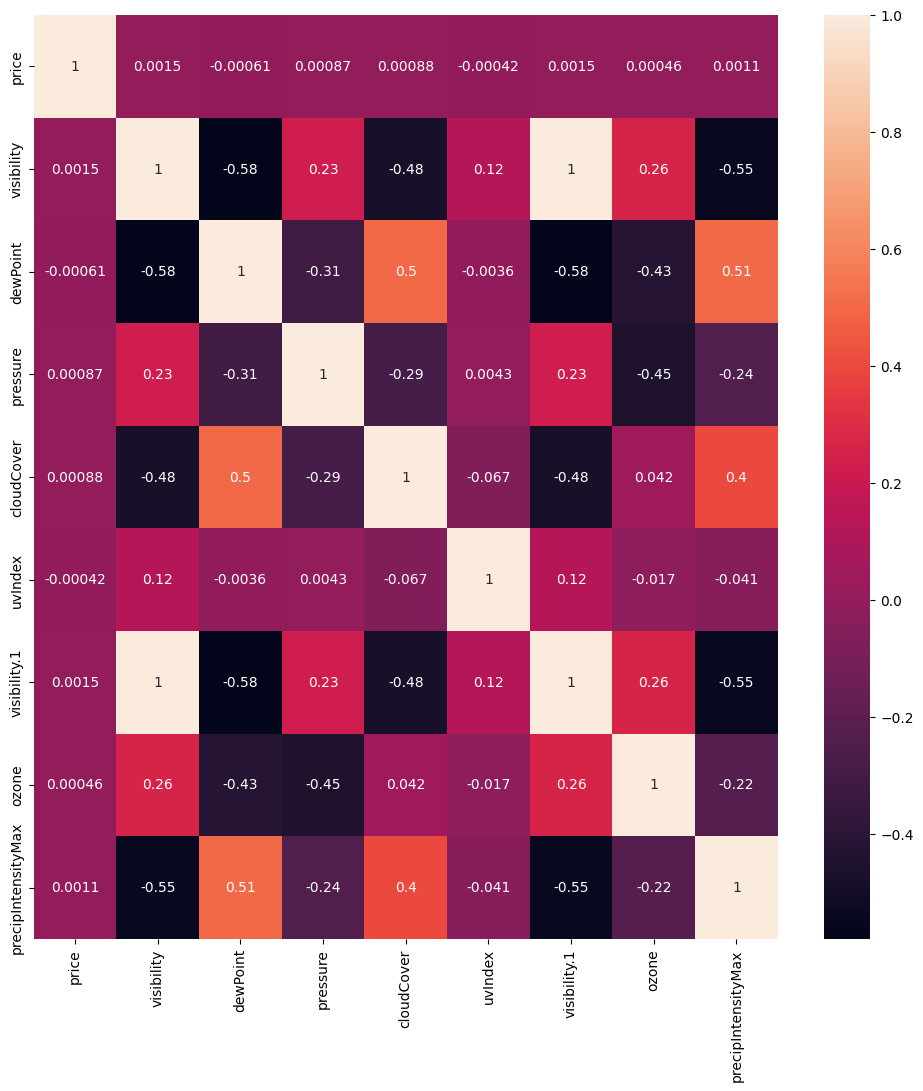

In [156]:
plt.figure(figsize=(12,12))
sns.heatmap(weather_num.corr(method='pearson'),annot=True)

insight: tidak ada column yang memiliki nilai korelasi > 0.01 kepada 'price' sehingga tidak ada yang masuk dalam feature selection.

###II. temperature

In [157]:
# pengelompokan numerical untuk temperature
temp_num = df_duplicate[['price','temperature','apparentTemperature','precipIntensity',
                       'precipProbability','humidity','temperatureHigh',
                       'temperatureHighTime','temperatureLow','temperatureLowTime',
                       'apparentTemperatureHigh','apparentTemperatureHighTime','apparentTemperatureLow',
                       'apparentTemperatureLowTime','temperatureMin','temperatureMinTime',
                       'temperatureMax','temperatureMaxTime','apparentTemperatureMin',
                       'apparentTemperatureMinTime','apparentTemperatureMax','apparentTemperatureMaxTime'
                       ]]

<Axes: >

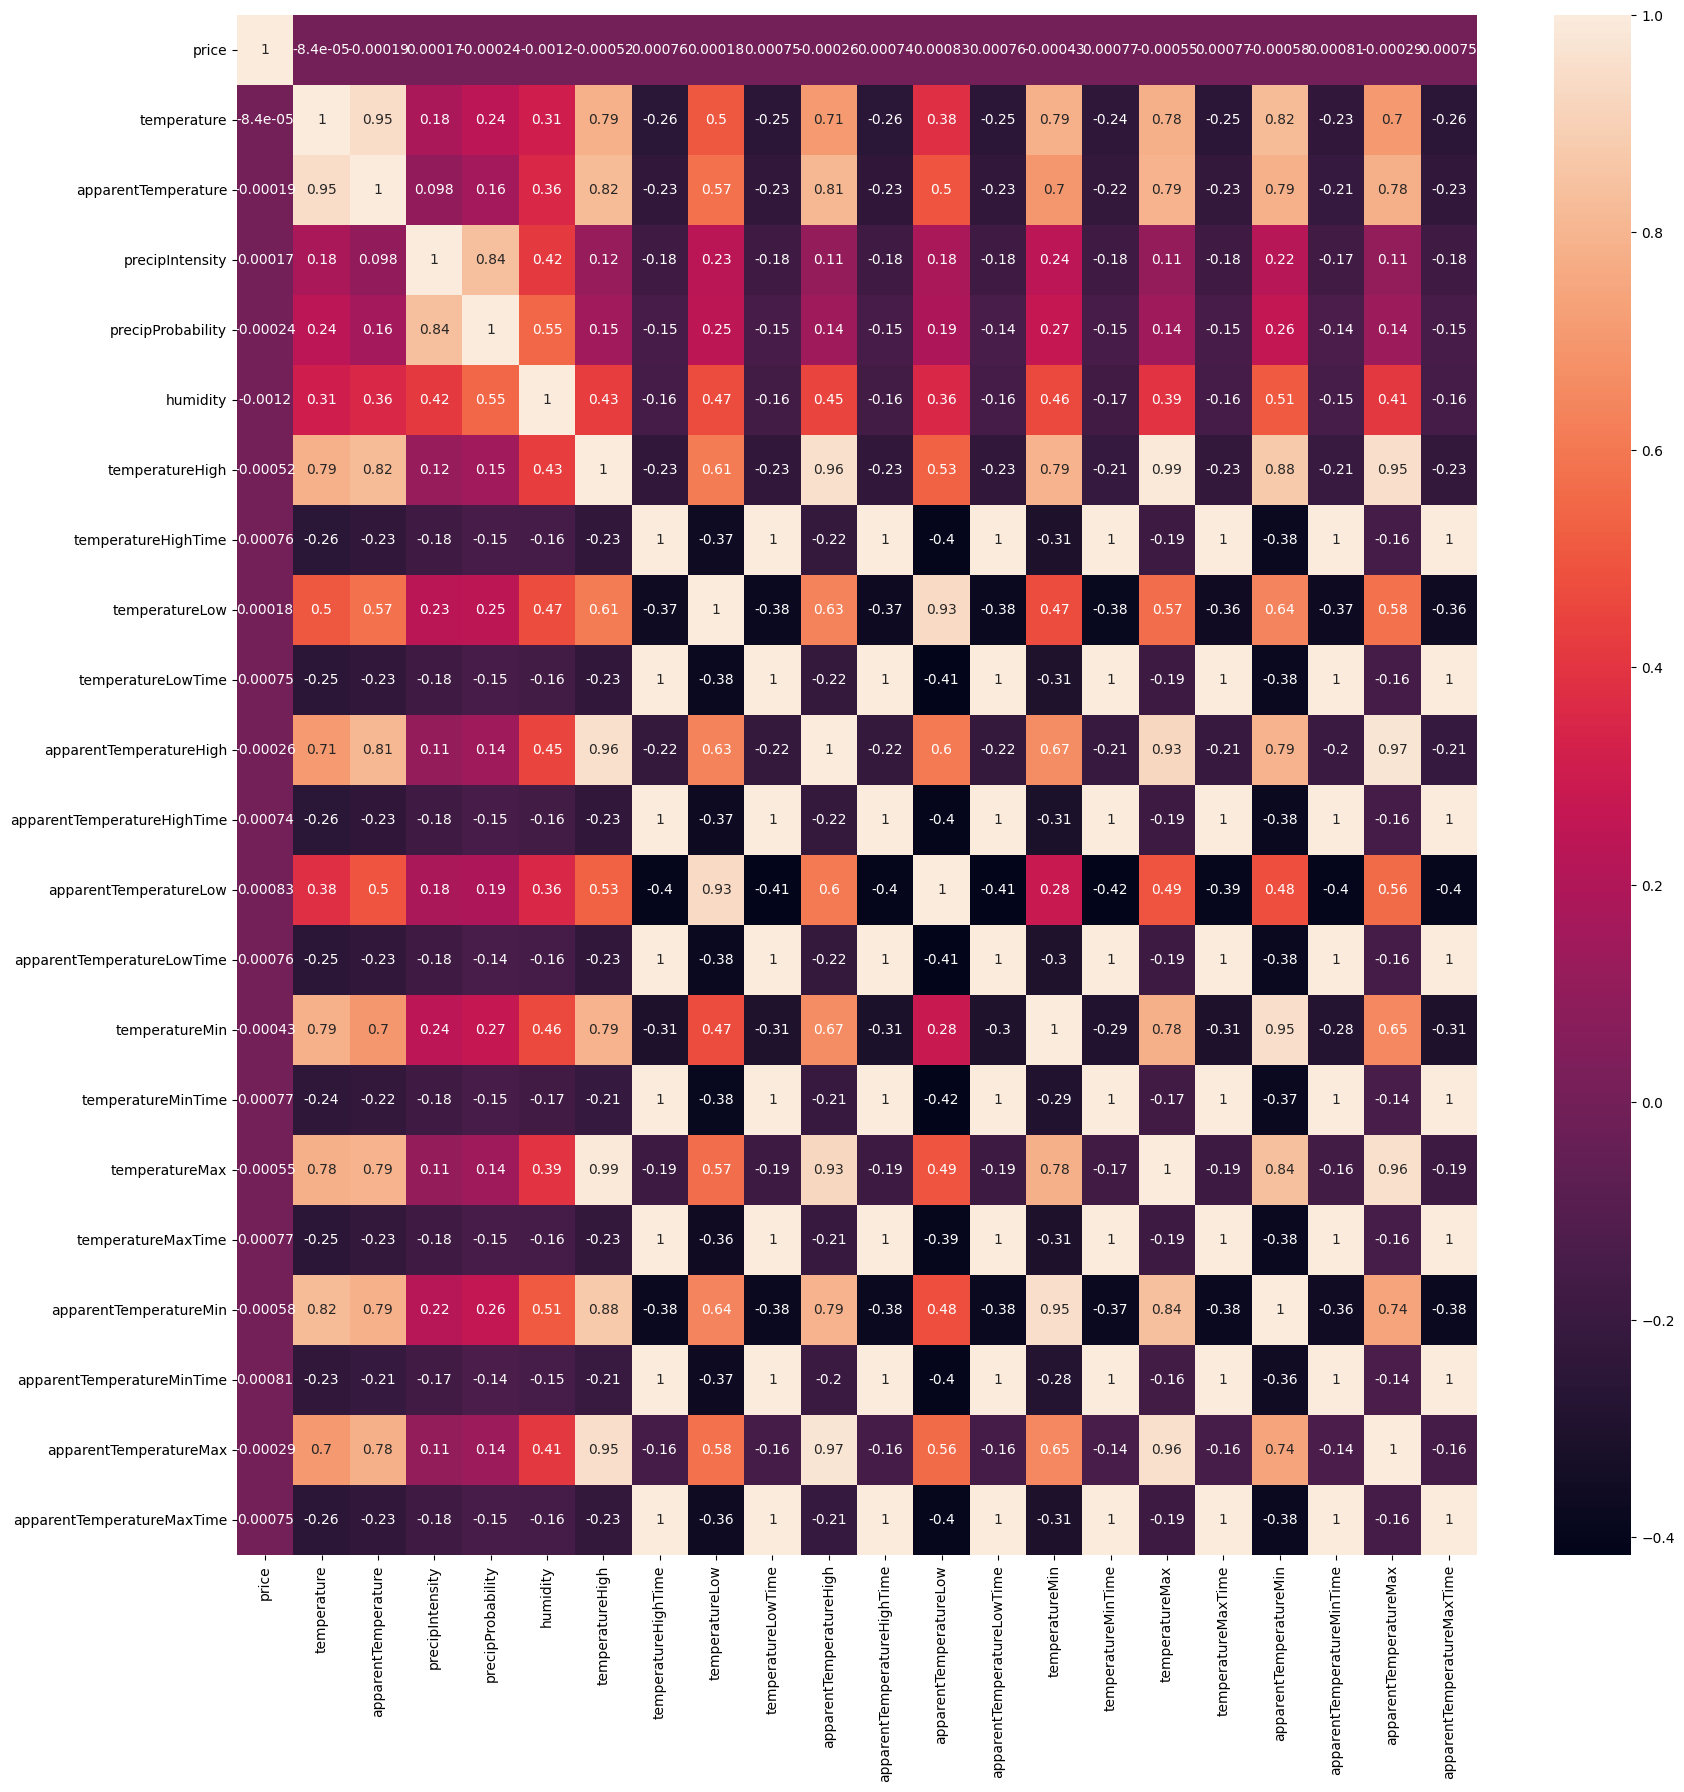

In [158]:
plt.figure(figsize=(20,20))
sns.heatmap(temp_num.corr(method='pearson'),annot=True)

insight: tidak ada column yang memiliki nilai korelasi > 0.01 kepada 'price' sehingga tidak ada yang masuk dalam feature selection.

###III. wind & sunset

In [159]:
# pengelompokan numerical untuk wind
wind_num = df_duplicate[['windSpeed','windGust','windGustTime', 'windBearing', 'sunriseTime','sunsetTime','moonPhase']]

<Axes: >

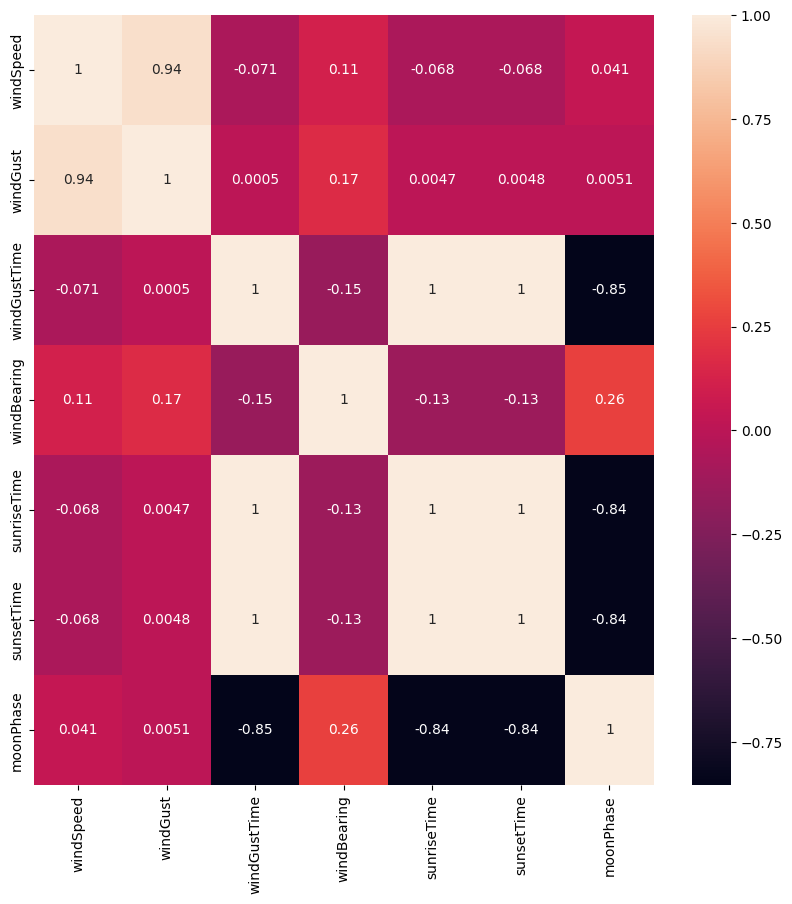

In [160]:
plt.figure(figsize=(10,10))
sns.heatmap(wind_num.corr(method='pearson'),annot=True)

insight: tidak ada column yang memiliki nilai korelasi > 0.01 kepada 'price' sehingga tidak ada yang masuk dalam feature selection.

###IV. Categorical values

In [161]:
# Pengelompokan data-data categorical
categorical = df_duplicate[['price', 'cab_type', 'source','destination', 'product_id','name','short_summary','long_summary','icon', 'surge_multiplier', 'timestamp'
                                ]]

In [162]:
df.dropna(subset=['price'], inplace=True)

In [163]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# encode categorical values
lab_encode = preprocessing.LabelEncoder()

df_category = df_duplicate.select_dtypes(include='object')
encode_cat = categorical.copy()

for column in df_category.columns:
    encode_cat[column] = lab_encode.fit_transform(df_category[column])

In [132]:
encode_cat

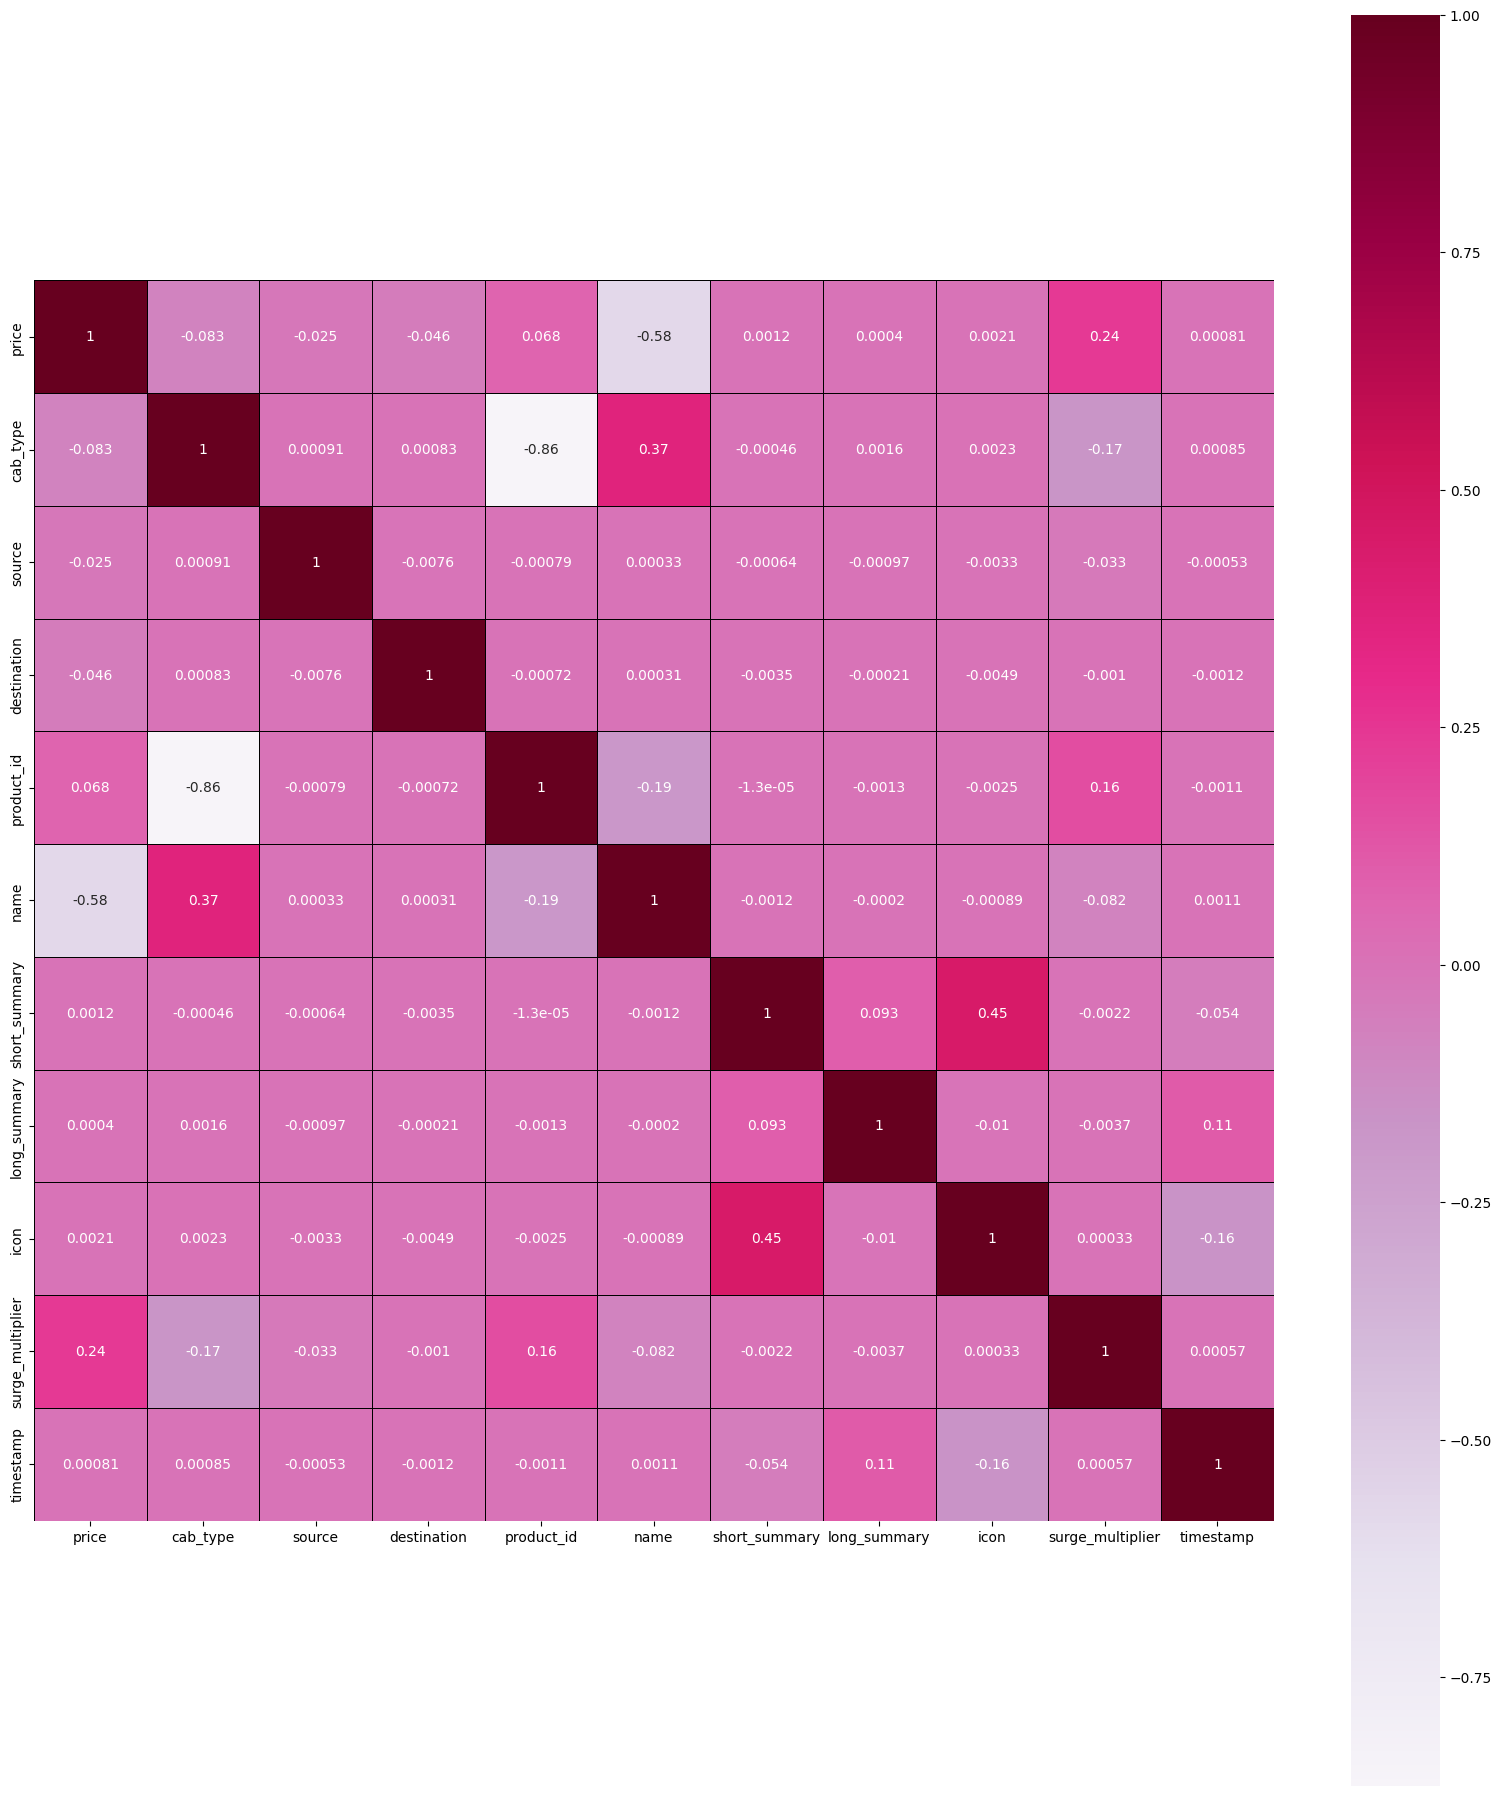

In [164]:
def heat_map(df_name,column_list):
    df_heatmap = df_name[column_list]
    plt.figure(figsize=(20,23))

    sns.heatmap(df_heatmap.corr(),
                annot=True,
                cmap="PuRd",
                linewidths=.5,
                linecolor='black',
                square=True)
heat_map_modeling = ['price', 'cab_type', 'source','destination', 'product_id','name','short_summary','long_summary','icon', 'surge_multiplier', 'timestamp']
heat_map(encode_cat,heat_map_modeling)

In [165]:
from scipy.stats import kendalltau
from scipy import stats


# correlation for categorical values
kendall_cabtype, p_value_cabtype = kendalltau(df['cab_type'], df['price'])
print(f"Korelasi Kendall Cab_type: {kendall_cabtype}")
print(f"P-Value Cab_type: {p_value_cabtype}")
print('==========================================')
kendall_source, p_value_source = kendalltau(df['source'], df['price'])
print(f"Korelasi Kendall source: {kendall_source}")
print(f"P-Value source: {p_value_source}")
print('==========================================')
kendall_destination, p_value_destination = kendalltau(df['destination'], df['price'])
print(f"Korelasi Kendall destination: {kendall_destination}")
print(f"P-Value destination: {p_value_destination}")
print('==========================================')
kendall_productid, p_value_productid = kendalltau(df['product_id'], df['price'])
print(f"Korelasi Kendall product id: {kendall_productid}")
print(f"P-Value product id: {p_value_productid}")
print('==========================================')
kendall_name, p_value_name = kendalltau(df['name'], df['price'])
print(f"Korelasi Kendall name: {kendall_name}")
print(f"P-Value name: {p_value_name}")
print('==========================================')
kendall_shortsum, p_shortsum = kendalltau(df['short_summary'], df['price'])
print(f"Korelasi Kendall short summary: {kendall_shortsum}")
print(f"P-Value short summary: {p_shortsum}")
print('==========================================')
kendall_longsum, p_longsum = kendalltau(df['long_summary'], df['price'])
print(f"Korelasi Kendall long summary: {kendall_longsum}")
print(f"P-Value long summary: {p_longsum}")
print('==========================================')
kendall_icon, p_icon = kendalltau(df['icon'], df['price'])
print(f"Korelasi Kendall icon: {kendall_icon}")
print(f"P-Value icon: {p_icon}")
print('==========================================')
kendall_surmul, p_surmul = kendalltau(df['surge_multiplier'], df['price'])
print(f"Korelasi Kendall surge multiplier: {kendall_surmul}")
print(f"P-Value surge multiplier: {p_surmul}")
print('==========================================')
kendall_timestamp, p_timestamp = kendalltau(df['timestamp'], df['price'])
print(f"Korelasi Kendall timestamp: {kendall_timestamp}")
print(f"P-Value timestamp: {p_timestamp}")
print('==========================================')

Korelasi Kendall Cab_type: -0.057004480669791274
P-Value Cab_type: 0.0
Korelasi Kendall source: -0.013055772826511497
P-Value source: 2.3529257792795844e-49
Korelasi Kendall destination: -0.03151675812702735
P-Value destination: 2.33081827277028e-278
Korelasi Kendall product id: 0.05077238589375829
P-Value product id: 0.0
Korelasi Kendall name: -0.39709440059363416
P-Value name: 0.0
Korelasi Kendall short summary: 0.00026118857283030585
P-Value short summary: 0.7781422430770276
Korelasi Kendall long summary: 0.0008231820404319457
P-Value long summary: 0.3689918246431466
Korelasi Kendall icon: 0.0014072307863441582
P-Value icon: 0.13075349023039154
Korelasi Kendall surge multiplier: 0.13715449743742802
P-Value surge multiplier: 0.0
Korelasi Kendall timestamp: -3.114127739221113e-05
P-Value timestamp: 0.9707537811865037


insight: semua column categorical values memiliki correlation yang sangat kecil terhadap price. namun beberapa column memiliki nilai p-value di bawah 0.05, sehingga berpengaruh signifikan terhadap 'price'

column-column tersebut adalah 'cab_type', 'product_id', 'name' dan 'surge_multiplier'. column-column tersebut akan dimasukkan dalam feature selection.

### Hasil Feature Selection:

- price
- distance
- surge multiplier
- cab type
- name
- hour

product id tidak diikutsertakan karena data yang ada terlalu random dan tidak berpola.

In [166]:
# columns dari hasil feature selection
df_feature = df_duplicate[['price', 'cab_type', 'name', 'distance', 'hour', 'surge_multiplier']]
df_feature.head()

,price,cab_type,name,distance,hour,surge_multiplier
0,5.0,Lyft,Shared,0.44,9,1.0
1,11.0,Lyft,Lux,0.44,2,1.0
2,7.0,Lyft,Lyft,0.44,1,1.0
3,26.0,Lyft,Lux Black XL,0.44,4,1.0
4,9.0,Lyft,Lyft XL,0.44,3,1.0


In [167]:
df_feature.isna().sum()

price               55095
cab_type                0
name                    0
distance                0
hour                    0
surge_multiplier        0
dtype: int64

ada null values pada price

In [168]:
df_feature.dropna(inplace=True)

In [169]:
df_feature.isna().sum()

price               0
cab_type            0
name                0
distance            0
hour                0
surge_multiplier    0
dtype: int64

sudah tidak ada null values pada price

##b. Split-Data

###I. Split between x (feature) and y (target)

In [170]:
# pembuatan feature & target, 'price' diremove karena merupakan nilai yang akan diprediksi
x = df_feature.drop(['price'], axis = 1)
y = df_feature['price']
x.head()

,cab_type,name,distance,hour,surge_multiplier
0,Lyft,Shared,0.44,9,1.0
1,Lyft,Lux,0.44,2,1.0
2,Lyft,Lyft,0.44,1,1.0
3,Lyft,Lux Black XL,0.44,4,1.0
4,Lyft,Lyft XL,0.44,3,1.0


###II. Split between train-data and test-data

In [171]:
from sklearn.model_selection import train_test_split

# pembuatan fungsi untuk pemisahan x-y train & test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 20)

# pengecekan size of shape
print('Train-size(x)', x_train.shape)
print('Test-size(x)', x_test.shape)
print('Train-size(y)', y_train.shape)
print('Test-size(y)', y_test.shape)

x_train.head()

Train-size(x) (446583, 5)
Test-size(x) (191393, 5)
Train-size(y) (446583,)
Test-size(y) (191393,)


,cab_type,name,distance,hour,surge_multiplier
439220,Lyft,Lux Black XL,1.36,18,1.0
605833,Uber,UberPool,3.22,20,1.0
324717,Lyft,Lyft,0.74,7,1.0
690755,Uber,UberPool,0.72,1,1.0
664526,Lyft,Lyft,1.20,22,1.0


In [172]:
df_y_train = pd.DataFrame(y_train)
df_y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446583 entries, 439220 to 40290
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   price   446583 non-null  float64
dtypes: float64(1)
memory usage: 6.8 MB


In [173]:
df_x_train = pd.DataFrame(x_train)
df_x_test = pd.DataFrame(x_test)

In [174]:
df_x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446583 entries, 439220 to 40290
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          446583 non-null  object 
 1   name              446583 non-null  object 
 2   distance          446583 non-null  float64
 3   hour              446583 non-null  int64  
 4   surge_multiplier  446583 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 20.4+ MB


In [175]:
for i in df_x_train.columns:
    print(i)
    print(df_x_train[i].nunique())
    print(df_x_train[i].unique())
    print('-' * 50)

cab_type
2
['Lyft' 'Uber']
--------------------------------------------------
name
12
['Lux Black XL' 'UberPool' 'Lyft' 'Shared' 'Lux Black' 'Lyft XL' 'UberX'
 'Lux' 'Black' 'WAV' 'Black SUV' 'UberXL']
--------------------------------------------------
distance
549
[1.36 3.22 0.74 0.72 1.2  4.68 2.87 0.71 2.   1.44 1.07 3.14 3.04 2.31
 3.5  1.27 4.37 4.55 0.7  2.89 1.35 3.16 1.97 1.41 0.55 0.96 2.79 1.84
 3.   3.03 2.67 1.25 1.75 2.8  2.86 1.57 2.62 1.61 1.5  1.03 2.12 1.72
 1.34 0.99 1.38 2.71 1.26 1.   4.44 2.17 2.64 3.02 3.34 0.91 0.54 2.66
 2.78 1.8  2.44 0.39 1.64 2.04 1.12 1.18 2.33 2.72 1.08 2.46 1.54 3.08
 5.35 0.56 0.62 2.63 1.16 3.07 0.49 2.23 2.84 2.32 4.72 0.92 0.9  0.59
 1.89 1.1  3.01 4.74 2.95 0.82 3.05 2.5  2.74 1.3  2.27 2.15 1.79 4.43
 1.02 2.57 0.98 4.5  3.17 1.52 2.98 1.23 2.14 1.63 1.73 0.61 4.25 2.26
 4.19 1.68 1.92 1.11 0.88 2.05 5.39 2.51 2.52 4.36 0.6  3.15 1.21 3.42
 2.48 1.24 1.71 2.96 0.68 1.45 2.38 1.22 3.23 1.04 0.75 4.4  2.03 1.91
 1.39 4.   2.58 1.09 1.1

In [176]:
df_x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191393 entries, 469227 to 133908
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          191393 non-null  object 
 1   name              191393 non-null  object 
 2   distance          191393 non-null  float64
 3   hour              191393 non-null  int64  
 4   surge_multiplier  191393 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.8+ MB


In [177]:
for i in df_x_test.columns:
    print(i)
    print(df_x_test[i].nunique())
    print(df_x_test[i].unique())
    print('-' * 50)

cab_type
2
['Uber' 'Lyft']
--------------------------------------------------
name
12
['UberPool' 'UberXL' 'UberX' 'Lux' 'WAV' 'Lyft' 'Lux Black' 'Black'
 'Black SUV' 'Lyft XL' 'Shared' 'Lux Black XL']
--------------------------------------------------
distance
548
[2.56 2.2  3.01 2.42 1.25 2.72 1.3  5.28 1.56 3.04 1.71 1.73 1.09 2.02
 2.66 3.24 1.41 2.84 1.61 3.53 1.54 1.1  2.62 1.23 2.83 1.94 1.35 2.05
 2.17 2.29 0.39 2.89 1.5  0.56 2.14 3.07 0.62 1.   3.39 2.16 2.79 1.06
 1.29 2.5  3.66 2.27 4.37 3.61 1.18 2.3  1.21 3.36 1.11 4.55 0.8  0.55
 1.4  0.58 1.04 5.35 1.89 1.07 2.94 3.14 0.59 2.77 3.27 3.2  1.58 0.53
 1.02 0.54 5.56 0.63 0.99 2.75 1.51 0.49 0.72 3.22 2.38 4.1  3.51 3.31
 1.45 4.4  1.33 1.91 2.43 1.53 0.67 4.15 1.16 3.44 3.21 2.25 3.05 5.42
 1.64 4.33 1.32 4.46 1.27 1.75 0.76 2.04 2.26 2.58 4.35 1.39 3.79 2.37
 1.34 2.92 1.87 1.52 4.51 2.98 4.74 1.08 2.61 1.78 0.73 1.95 3.1  1.47
 1.97 2.48 3.15 7.19 2.86 1.03 1.57 4.44 2.28 2.36 2.08 3.37 1.46 2.44
 4.13 1.44 2.06 3.08 1.2

###III. Handle missing values

In [178]:
x_train.isnull().sum()

cab_type            0
name                0
distance            0
hour                0
surge_multiplier    0
dtype: int64

tidak ada null values

In [179]:
x_test.isnull().sum()

cab_type            0
name                0
distance            0
hour                0
surge_multiplier    0
dtype: int64

tidak ada null values

In [180]:
y_train.isnull().sum()

0

tidak ada null values

In [181]:
y_test.isnull().sum()

0

tidak ada null values

###IV. Split between numeric & categorical values

In [182]:
# pengelompokkan numerical & categorical columns
num_columns = ['distance']
cat_columns = ['hour','surge_multiplier','name','cab_type']

In [183]:
# split train dan test set berdasarkan tipe column

x_trainum = x_train[num_columns]
x_traincat = x_train[cat_columns]

x_testnum = x_test[num_columns]
x_testcat = x_test[cat_columns]

x_trainum.head()

,distance
439220,1.36
605833,3.22
324717,0.74
690755,0.72
664526,1.20


In [184]:
df_trainum = pd.DataFrame(x_trainum)
df_trainum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446583 entries, 439220 to 40290
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   distance  446583 non-null  float64
dtypes: float64(1)
memory usage: 6.8 MB


##c. Cardinaility check

In [256]:
print('distance       : {}'.format(len(df_feature.distance.unique())))
print('surge multipier: {}'.format(len(df_feature.surge_multiplier.unique())))
print('cab type       : {}'.format(len(df_feature.cab_type.unique())))
print('name           : {}'.format(len(df_feature.name.unique())))
print('hour           : {}'.format(len(df_feature.hour.unique())))

distance       : 549
surge multipier: 7
cab type       : 2
name           : 12
hour           : 24


##d. Outlier handling

###I. Cek skewness dari 'distance'

In [187]:
# cek skewness dari feature 'distance'
x_train['distance'].skew()

0.8163084022263418

nilai skewness menunjukkan nilai positif, sehingga dapat disimpulkan bahwa data terdistribusi cukup normal dan berpusat di kiri.

In [188]:
# Pembuatan histogram & box-plot
def diagnostic_plots(df, variable):
    # menentukan figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

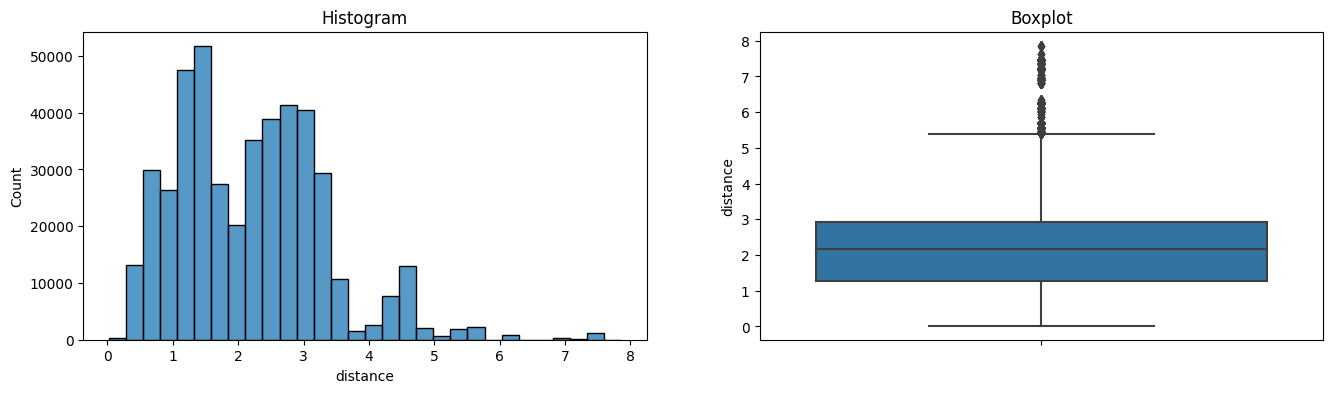

In [189]:
# memanggil fungsi untuk menampilkan histogram dan boxplot
diagnostic_plots(x_train, 'distance')

###II. Outlier determining

In [190]:
# menentukan batas atas dan bawah dari data skewed
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [191]:
upper_boundary_fare, lower_boundary_fare = find_skewed_boundaries(x_train, 'distance', 1.5)
upper_boundary_fare, lower_boundary_fare

(5.405, -1.195)

In [192]:
# melihat jumlah dan persentase data 'distance' yang termasuk dalam threshold outlier
print('insight :')
print('Total data distance: {}'.format(len(x_train)))
print('Distance that more than 5.405: {}'.format(len(x_train[x_train['distance'] > upper_boundary_fare])))
print('% Distance that more than 5.405: {}'.format(len(x_train[x_train['distance'] > upper_boundary_fare])/len(x_train) * 100))

insight :
Total data distance: 446583
Distance that more than 5.405: 5055
% Distance that more than 5.405: 1.1319284433128893


###III. Outlier handling

In [193]:
pip install feature-engine

In [194]:
#fungsi untuk capping
from feature_engine.outliers import Winsorizer

winsoriser_distance = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables=['distance'])

winsoriser_distance.fit(x_trainum)

x_traincap = winsoriser_distance.transform(x_trainum)
x_testcap = winsoriser_distance.transform(x_testnum)
winsoriser_distance.right_tail_caps_

{'distance': 5.405}


Distance - Before Capping


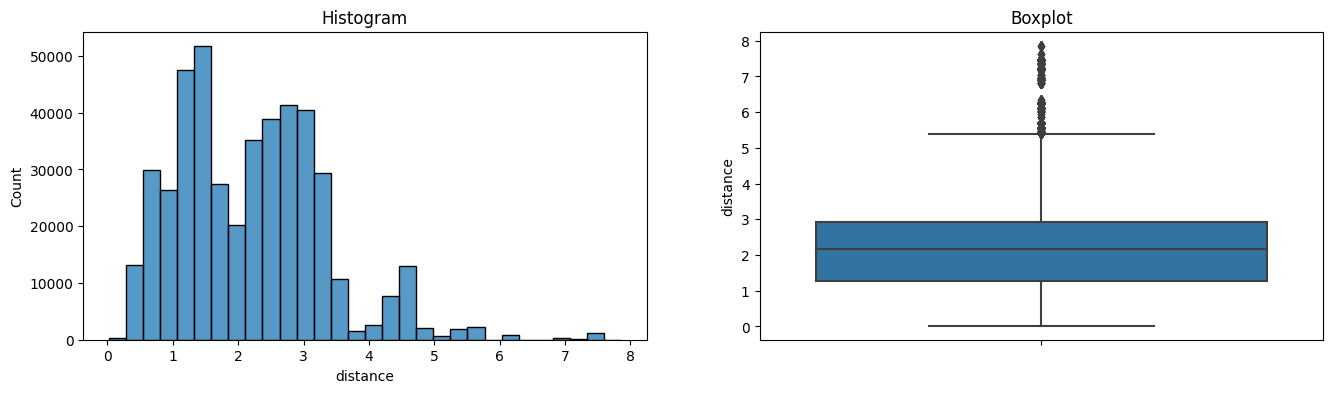


Distance - After Capping


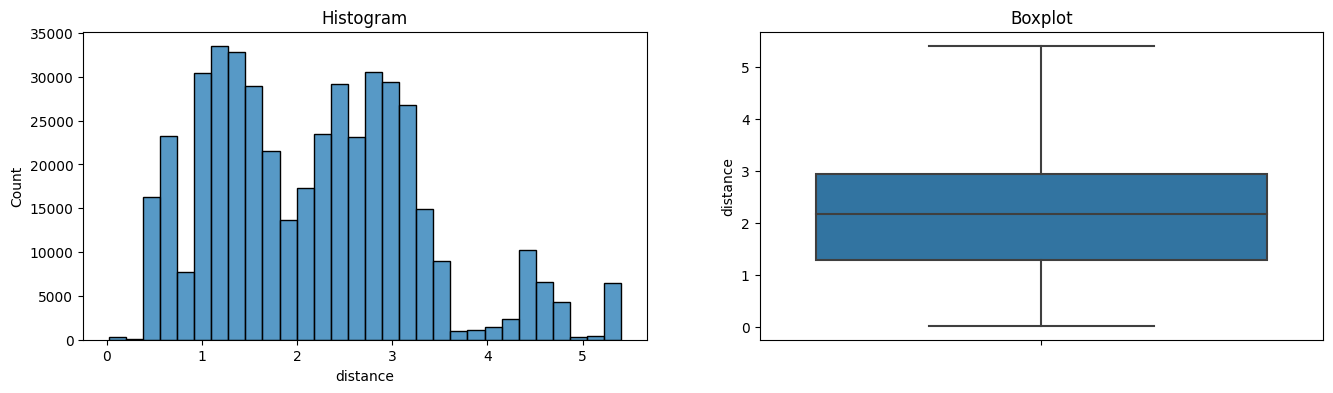

In [195]:
# melihat perbedaan 'distance' sebelum dan sesudah capping
print('\nDistance - Before Capping')
diagnostic_plots(x_train, 'distance')

print('\nDistance - After Capping')
diagnostic_plots(x_traincap, 'distance')

insight: setelah capping, persebaran data terdistribusi lebih normal meskipun memiliki 2 peak data.

##e. Encoding

In [196]:
from sklearn.preprocessing import OneHotEncoder

In [197]:
# encoding x train & set untuk column kategori
enc = OneHotEncoder(sparse=False)
encode_train = enc.fit_transform(x_traincat[['name','cab_type']])
encode_test = enc.transform(x_testcat[['name','cab_type']])

In [198]:
x_test_encode = pd.DataFrame(encode_test,columns = enc.get_feature_names_out(['name','cab_type']))
x_train_encode = pd.DataFrame(encode_train,columns = enc.get_feature_names_out(['name','cab_type']))

x_train_encode.head()

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


##f. Feature Scaling

In [199]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_traincap)
x_trainum_scaled = scaler.transform(x_traincap)
x_testnum_scaled = scaler.transform(x_testcap)

x_trainum_scaled

array([[0.24883937],
       [0.59424327],
       [0.13370474],
       ...,
       [0.57938719],
       [0.38997214],
       [0.25626741]])

In [200]:
x_train_encode.columns

Index(['name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black',
       'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared',
       'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV',
       'cab_type_Lyft', 'cab_type_Uber'],
      dtype='object')

## g. Concate Data

In [201]:
# pembuatan tabel untuk nantinya dimasukkan data prediksi
x_train_final = np.concatenate([x_train_encode,x_trainum_scaled,x_train[['surge_multiplier']]],axis=1)
x_train_final = pd.DataFrame(x_train_final,columns=['name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black',
       'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared',
       'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV',
       'cab_type_Lyft', 'cab_type_Uber','distance','surge_multiplier'])
x_train_final.head()

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber,distance,surge_multiplier
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.248839,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.594243,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.133705,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.129991,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.219127,1.0


In [202]:
x_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446583 entries, 0 to 446582
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name_Black         446583 non-null  float64
 1   name_Black SUV     446583 non-null  float64
 2   name_Lux           446583 non-null  float64
 3   name_Lux Black     446583 non-null  float64
 4   name_Lux Black XL  446583 non-null  float64
 5   name_Lyft          446583 non-null  float64
 6   name_Lyft XL       446583 non-null  float64
 7   name_Shared        446583 non-null  float64
 8   name_UberPool      446583 non-null  float64
 9   name_UberX         446583 non-null  float64
 10  name_UberXL        446583 non-null  float64
 11  name_WAV           446583 non-null  float64
 12  cab_type_Lyft      446583 non-null  float64
 13  cab_type_Uber      446583 non-null  float64
 14  distance           446583 non-null  float64
 15  surge_multiplier   446583 non-null  float64
dtypes:

In [203]:
x_test_final = np.concatenate([x_test_encode,x_testnum_scaled,x_test[['surge_multiplier']]],axis=1)
x_test_final = pd.DataFrame(x_test_final,columns=['name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black',
       'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared',
       'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV',
       'cab_type_Lyft', 'cab_type_Uber','distance','surge_multiplier'])
x_train_final.head()

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber,distance,surge_multiplier
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.248839,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.594243,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.133705,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.129991,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.219127,1.0


In [204]:
x_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191393 entries, 0 to 191392
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name_Black         191393 non-null  float64
 1   name_Black SUV     191393 non-null  float64
 2   name_Lux           191393 non-null  float64
 3   name_Lux Black     191393 non-null  float64
 4   name_Lux Black XL  191393 non-null  float64
 5   name_Lyft          191393 non-null  float64
 6   name_Lyft XL       191393 non-null  float64
 7   name_Shared        191393 non-null  float64
 8   name_UberPool      191393 non-null  float64
 9   name_UberX         191393 non-null  float64
 10  name_UberXL        191393 non-null  float64
 11  name_WAV           191393 non-null  float64
 12  cab_type_Lyft      191393 non-null  float64
 13  cab_type_Uber      191393 non-null  float64
 14  distance           191393 non-null  float64
 15  surge_multiplier   191393 non-null  float64
dtypes:

#6. Model definition

In [205]:
# pemanggilan fungsi linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#7. model training

In [206]:
model.fit(x_train_final, y_train)

LinearRegression()

In [207]:
x_train_final_shape = x_train_final.shape[1]
print(x_train_final_shape)

16


In [208]:
y_train_shape = y_train.shape
print(y_train_shape)

(446583,)


#8. Model Evaluation

In [209]:
y_pred_train = model.predict(x_train_final)
y_pred_test = model.predict(x_test_final)
y_pred_train

array([29.25195312, 11.77929688,  4.72851562, ..., 17.37109375,
        8.60742188,  3.77539062])

In [210]:
y_train.head()

439220    26.0
605833     9.0
324717     7.0
690755     6.5
664526     7.0
Name: price, dtype: float64

##I. Mean Absolute Error (MAE)

In [211]:
from sklearn.metrics import mean_absolute_error

print('train-set error: ', mean_absolute_error(y_pred_train, y_train))
print('test-set error: ', mean_absolute_error(y_pred_test, y_test))

train-set error:  1.7821027467178552
test-set error:  1.7826802439058638


insight: MAE sangat rendah dan tidak berbeda jauh antara train-set dan test-set, maka range yang dihasilkan adalah +/- 1.78 dari nilai prediksi

##II. R-squared

In [212]:
from sklearn.metrics import r2_score
r1 = r2_score (y_train,y_pred_train)
r2 = r2_score(y_test,y_pred_test)

print(f'train-set R-squared = {r1}')
print(f'test-set R-squared = {r2}')

train-set R-squared = 0.9275000382054347
test-set R-squared = 0.9278168328264326


R-squared menunjukkan nilai 92% untuk train-set dan test-set yang merupakan nilai yang sangat tinggi dan menunjukkan fitness dari model yang dibuat.

##III. Mean Squared Error (MSE)

In [213]:
from sklearn.metrics import mean_squared_error
print("train-set MSE:",mean_squared_error(y_train,y_pred_train))
print("test-set MSE",mean_squared_error(y_test,y_pred_test))

train-set MSE: 6.298171804829394
test-set MSE 6.287916930938521


insight: nilai MSE cukup rendah dan tidak jauh berbeda untuk train-set dan test-set

##IV. Root Mean Squared Error (RMSE)

In [214]:
print("train-set RMSE:",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("test-set RMSE:",np.sqrt(mean_squared_error(y_test,y_pred_test)))

train-set RMSE: 2.5096158679824674
test-set RMSE: 2.507571919395039


insight: nilai RMSE sangat rendah dan tidak berbeda jauh untuk train-set dan test-set. mengacu dari MSE, RMSE merupakan akar dari bilangan sebelumnya, sehingga range yang dihasilkan adalah +/- 2.5 dari nilai prediksi

#9. Model Saving

In [241]:
import pickle
import joblib
import json

import warnings
warnings.filterwarnings('ignore')

In [216]:
# fungsi penyimpanan file
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('enc.pkl', 'wb') as file_4:
  pickle.dump(enc, file_4)

with open('model.pkl', 'wb') as file_5:
  pickle.dump(model, file_5)

#10. Model Inference

In [217]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

with open("enc.pkl", "rb") as f:
    enc = pickle.load(f)

In [230]:
# perumusan berapa kali pemanggilan random untuk data prediksi
np.random.seed(30)

# pemisahan 'name' antara Uber dan Lyft
name_cat_lyft = ['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black']
name_cat_uber = ['UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool']

cab_type_cat = ['Uber', 'Lyft']

# pembuatan data dummy
dummy = {
    'distance': np.random.uniform(0.02, 7.86, 10),
    'surge_multiplier': np.random.randint(1, 3, 10),
    'cab_type': np.random.choice(cab_type_cat, 10),
    }

dummy['name'] = [np.random.choice(name_cat_uber) if cab == 'Uber' else np.random.choice(name_cat_lyft) for cab in dummy['cab_type']]

In [231]:
df_inf = pd.DataFrame(dummy)
df_inf.shape

(10, 4)

In [232]:
df_scal = scaler.transform(df_inf[['distance']])
df_scal.shape

(10, 1)

In [233]:
df_enc = enc.transform(df_inf[['name','cab_type']])
df_enc.shape

(10, 14)

In [234]:
df_enc_shape = np.array(df_enc)
shape_print = pd.DataFrame(df_enc)
shape_print.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [235]:
df_inf_final = np.concatenate([df_enc,df_scal,df_inf[['surge_multiplier']]],axis=1)

In [236]:
df_inf_final.shape

(10, 16)

In [237]:
df_inf_final = np.array(df_inf_final)

In [243]:
data_inf_final = pd.DataFrame(df_inf_final,columns=['name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black',
       'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared',
       'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV',
       'cab_type_Lyft', 'cab_type_Uber','distance','surge_multiplier'])
data_inf_final.head()

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber,distance,surge_multiplier
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.937806,2.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.554330,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.965329,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.238258,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.401457,1.0


In [244]:
prediction = model.predict(data_inf_final)

In [245]:
# pemanggilan data prediksi dari model yang sudah dibuat
df_inf['Prediction'] = prediction
df_inf

,distance,surge_multiplier,cab_type,name,Prediction
0,5.070085,2,Lyft,Lyft,35.482422
1,3.005068,1,Uber,Black,22.914062
2,5.218296,1,Lyft,Lyft XL,23.365234
3,1.303022,1,Uber,Black,18.005859
4,7.566845,1,Uber,UberX,25.316406
5,2.737829,1,Lyft,Lux Black XL,33.224609
6,7.795328,1,Lyft,Lux,33.275391
7,1.862854,1,Lyft,Shared,5.111328
8,4.611843,1,Uber,WAV,16.798828
9,3.208450,1,Lyft,Lux Black,25.337891


In [255]:
df_inf.describe()

,distance,surge_multiplier,Prediction
count,10.000000,10.000000,10.000000
mean,4.237962,1.100000,23.883203
std,2.226480,0.316228,9.143969
min,1.303022,1.000000,5.111328
25%,2.804639,1.000000,19.232910
50%,3.910147,1.000000,24.340820
75%,5.181243,1.000000,31.252930
max,7.795328,2.000000,35.482422


#11. Conclusion

Tujuan dari Graded Challenge 4 adalah membuat model Linear Regression untuk memprediksi harga perjalanan Uber dan Lyft.

Proses prediksi diawali dengan mengelompokkan columns berdasarkan weather, temperature, wind & sunset, dan categorical values. Setelah proses perhitungan korelasi dan p-value, disimpulkan untuk feature selection mengambil column distance, surge multiplier, cab type, name, dan hour, yang kemudian akan digunakan sebagai basis model dan prediksi harga.

Dalam pengetesan fitness dari model yang dibuat, ditemukan bahwa model yang dibuat sudah fit dengan skor MAE 1.78, MSE & RMSE 6.2 dan 2.5 yang menyatakan bahwa error-terms dari model cukup rendah, serta R-squared 92% pada train-set dan test-set, yang menyatakan bahwa dependent variable sudah terjelaskan dengan baik oleh independent variables.

Melalui Linear Regression yang dibuat, model memprediksi 10 kali berdasarkan categorical values yang dipisah berdasarkan Uber & Lyft, dan membuat acuan dari distance, surge multiplier, dan cab type. Model yang dibuat menemukan nilai prediksi harga dengan mean: 23.8, min: 5.11, dan max: 35.48 dengan standard deviation 9.14

# Conceptual Problem

## 1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression ! (Gunakan bahasa anda sendiri)

- **Linearity**: ada keterkaitan antara dependent variable dan independent variable yang bersifat linier. Ini berarti bahwa setiap perubahan dalam dependent variable akan memiliki hubungan yang sebanding dengan perubahan dalam independent variable.
- **Independence**: variabel-variabel independen yang ada pada observasi dataset berdiri sendiri dan tidak dipengaruhi oleh variabel yang lain.
- **Homoscedasticity**: ini berarti bahwa variance dalam residuals dari rentang independent variable adalah konstan. ini juga dapat diartikan bahwa ada keseragaman dalam error terms dari independent variables.
- **Normality in residuals**: error terms pada residuals dari model terdistribusi secara normal, sehingga seharusnya memiliki nilai rata-rata 0.
- **Absence in multicollinearity**: tidak ada korelasi yang tinggi di antara independent variables.
- **Absence in autocorrelation**: tidak ada korelasi di antara error-terms pada data-data observasi dari periode waktu yang berbeda-beda.

## 2. Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun!

In [253]:
coefficients = model.coef_
intercept = model.intercept_
print("Nilai intercept :", model.intercept_)

Nilai intercept : -9338860534654.8


Nilai intercept: -9338860534654.8

ini mengartikan bahwa nilai prediksi (y) akan bernilai -9338860534654.8 ketika semua input distance & surge multiplier bernilai 0 dan cab type & name bernilai n/a.

In [254]:
coefficients = model.coef_
intercept = model.intercept_

params = {
    'feature': x_train_final.columns.tolist(),
    'coefficient': model.coef_.tolist()
}

print('Intercept : ', intercept)
pd.DataFrame(params)

Intercept :  -9338860534654.8


,feature,coefficient
0,name_Black,3.495868e+12
1,name_Black SUV,3.495868e+12
2,name_Lux,1.205748e+12
3,name_Lux Black,1.205748e+12
4,name_Lux Black XL,1.205748e+12
5,name_Lyft,1.205748e+12
6,name_Lyft XL,1.205748e+12
7,name_Shared,1.205748e+12
8,name_UberPool,3.495868e+12
9,name_UberX,3.495868e+12


nilai-nilai coefficient yang tertulis menunjukkan pengaruh yang akan terjadi pada nilai predict (dependent variable) setiap ada peningkatan satu unit (independent variable). misal: setiap peningkatan 1 unit pada 'distance', maka nilai 'price' akan naik kira-kira sebesar USD 15.53